<a href="https://colab.research.google.com/github/marinocom/ANPR-GIA/blob/pipeline/notebooks/ocr_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# maybe necessary to run if ultralytics not detected
!pip install ultralytics

In [10]:
from ultralytics import YOLO
import os

In [11]:
def run_inference(weights_path, source, img_size=640, device='0'):
	"""
	Function to run inference using the trained YOLOv11 model.

	Parameters:
	- weights_path: Path to the trained weights
	- source: Directory or image path to run inference on
	- img_size: Image size for inference (default: 640)
	- conf_thresh: Confidence threshold (default: 0.25)
	- device: Device to run on ('0' for GPU, 'cpu' for CPU)
	"""

	print(f"Running inference on images in {source}")
	model = YOLO(weights_path).to(device)
	image_filenames = [filename for filename in os.listdir(source) if filename.endswith(('.jpg', '.jpeg', '.png'))]
	image_paths = [os.path.join(source, filename) for filename in image_filenames]
	results = [model(img_path, imgsz=img_size) for img_path in image_paths]
	print("Inference Complete.")
	return results

In [12]:
weights_path = "/content/drive/MyDrive/AI 3rd Year/Vision Learning I/yolo11n_finetuned.pt"
source = "/content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal"
img_size = 640
device = "cpu"

In [13]:
groundtruth = []
image_filenames = [filename for filename in os.listdir(source) if filename.endswith(('.jpg', '.jpeg', '.png'))]
for filename in image_filenames:
  groundtruth.append(filename.split(".")[0])

print(groundtruth)


['1111LRB', '1426JVT', '2885BKJ', '3691MTY', '1949LLT', '8778LVY', '1599DLB', '3497BYY', '7332JKC', '7469JYS', '3046KMK', '1755JKV']


In [14]:
results = run_inference(weights_path,source,img_size, device = device)

Running inference on images in /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/1111LRB.jpg: 640x640 1 license_plate, 592.5ms
Speed: 13.5ms preprocess, 592.5ms inference, 26.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/1426JVT.jpg: 640x640 1 license_plate, 784.0ms
Speed: 3.0ms preprocess, 784.0ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/2885BKJ.jpg: 640x640 1 license_plate, 852.8ms
Speed: 6.0ms preprocess, 852.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/3691MTY.jpg: 640x640 1 license_plate, 830.3ms
Speed: 8.0ms preprocess, 830.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/M

In [15]:
results

[[ultralytics.engine.results.Results object with attributes:
  
  boxes: ultralytics.engine.results.Boxes object
  keypoints: None
  masks: None
  names: {0: 'license_plate'}
  obb: None
  orig_img: array([[[252, 244, 244],
          [252, 244, 244],
          [251, 243, 243],
          ...,
          [168, 163, 165],
          [168, 163, 165],
          [167, 162, 164]],
  
         [[252, 244, 244],
          [252, 244, 244],
          [251, 243, 243],
          ...,
          [169, 164, 166],
          [169, 164, 166],
          [168, 163, 165]],
  
         [[252, 244, 244],
          [252, 244, 244],
          [252, 244, 244],
          ...,
          [171, 166, 168],
          [170, 165, 167],
          [170, 165, 167]],
  
         ...,
  
         [[125, 118, 123],
          [123, 116, 121],
          [125, 118, 123],
          ...,
          [190, 187, 202],
          [191, 188, 203],
          [191, 188, 203]],
  
         [[126, 119, 124],
          [123, 116, 121],
        

In [16]:
results[0][0].boxes.xyxy[0].cpu().numpy().astype(int).tolist()

[193, 286, 359, 379]

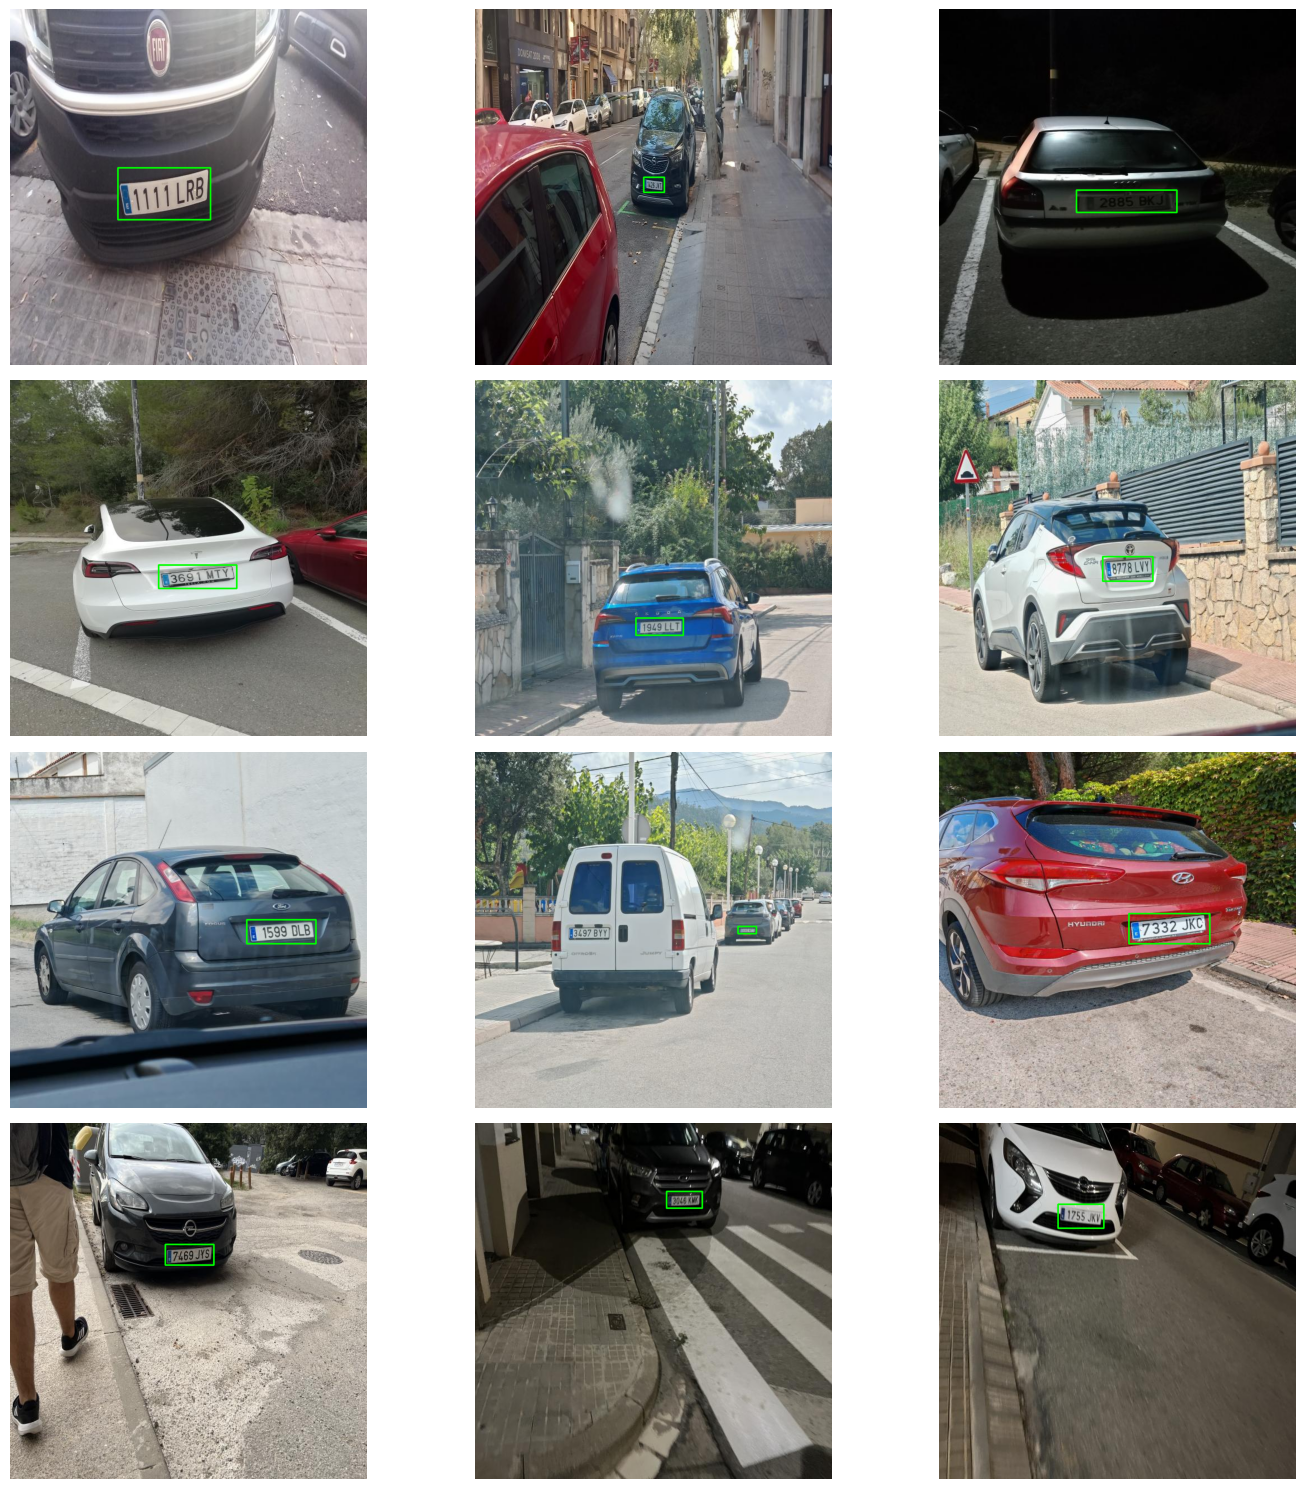

In [17]:
from re import A
import cv2
import matplotlib.pyplot as plt
import math

cropped_words = []

# Determine the number of rows and columns for the subplot grid
num_images = len(results)
cols = 3  # Number of columns (adjust as needed)
rows = math.ceil(num_images / cols)  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over the images and display them in subplots
for idx, result in enumerate(results):
	result = result[0]
	img = result.orig_img
	box = result.boxes.xyxy[0].cpu().numpy().astype(int).tolist()

	if img is not None:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

		# Draw the bounding box on the image
		x1, y1, x2, y2 = box
		cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
		cropped_word = img[y1:y2, x1:x2]
		cropped_words.append(cropped_word)

		# Display the image in the subplot
		axes[idx].imshow(img)
		axes[idx].axis('off')  # Hide the axis
	else:
		print("Could not load image")

# Remove any unused subplots
for i in range(num_images, len(axes)):
	fig.delaxes(axes[i])

# Display the grid of images
plt.tight_layout()
plt.show()

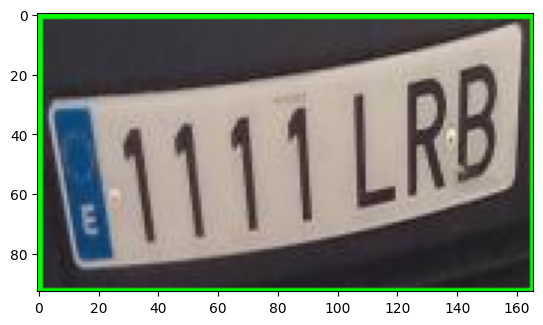

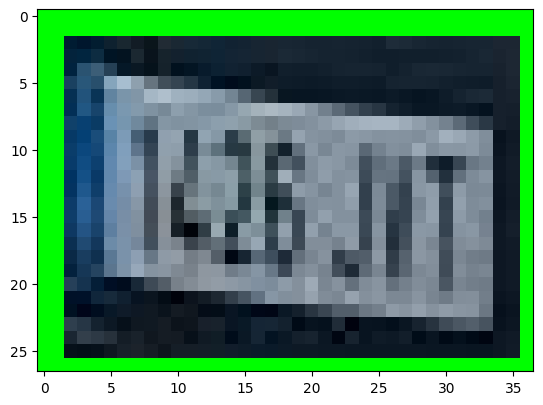

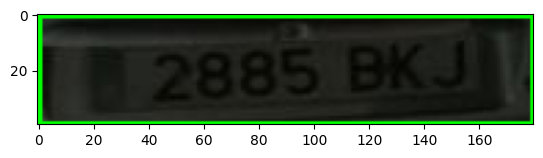

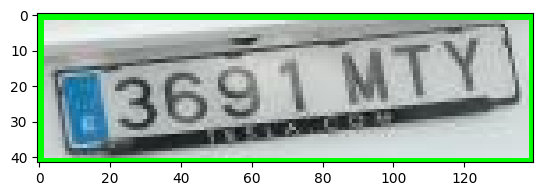

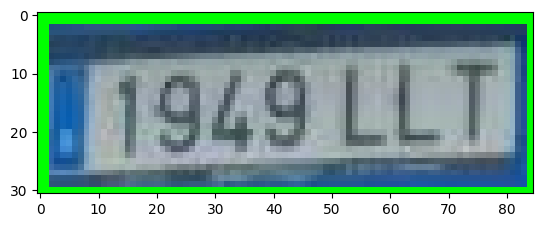

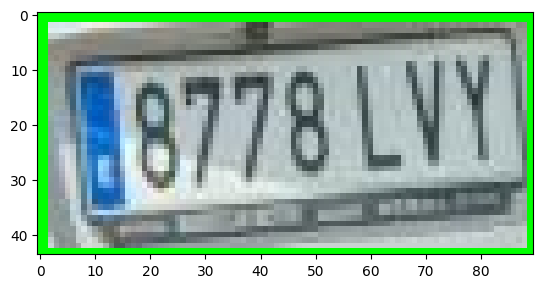

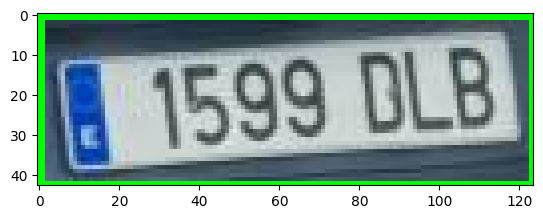

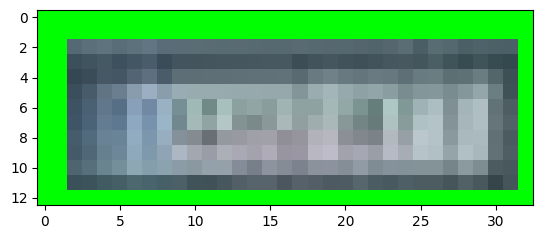

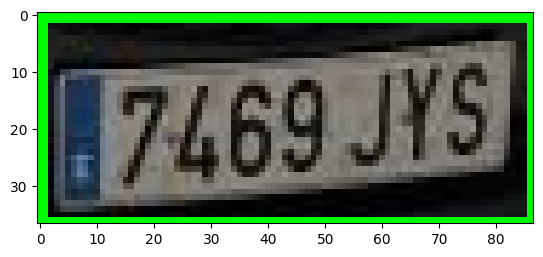

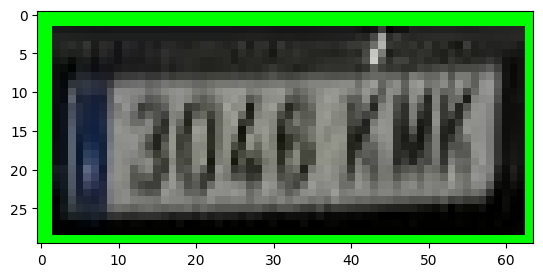

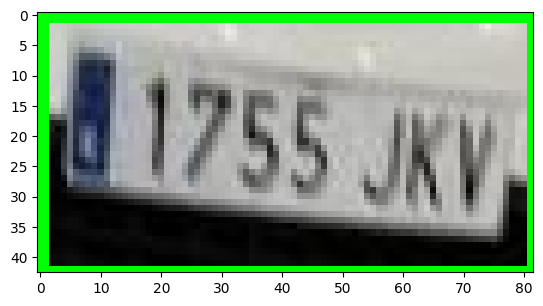

In [18]:
for img in cropped_words:
    plt.imshow(img)
    plt.show()

In [19]:
!pip install easyocr
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 18.9 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

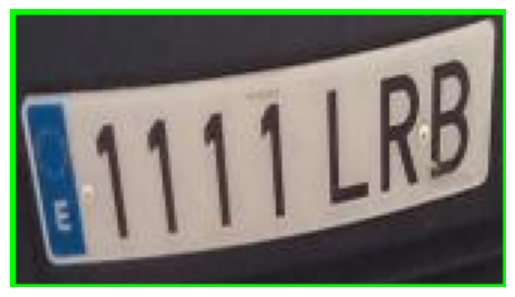

Texto detectado en la imagen:
LRb
1111


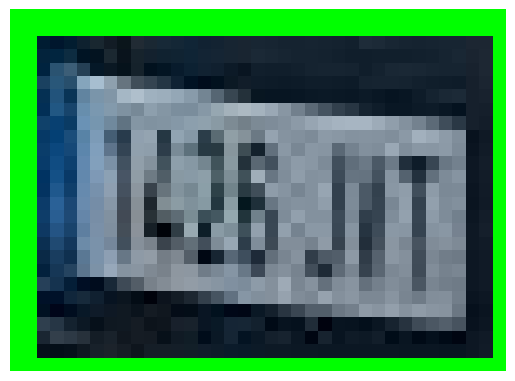

Texto detectado en la imagen:
126 Ji


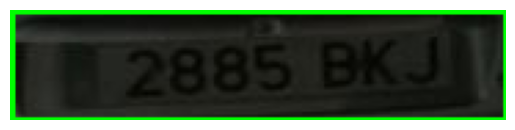

Texto detectado en la imagen:
2883@


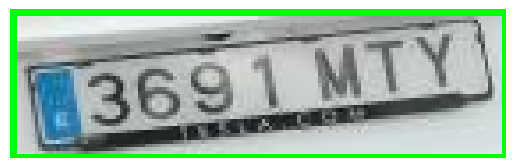

Texto detectado en la imagen:
MIY
3691


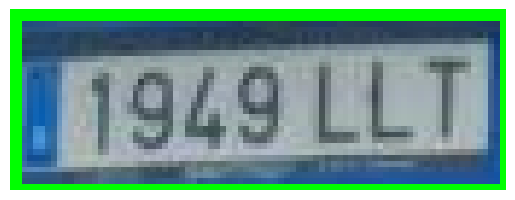

Texto detectado en la imagen:
[9LILLI


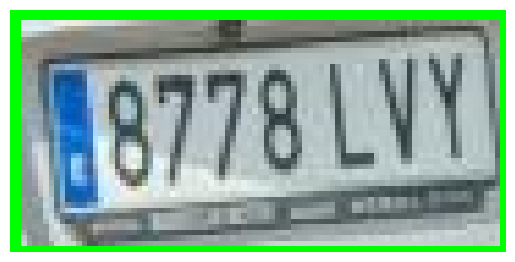

Texto detectado en la imagen:
8778 LVY


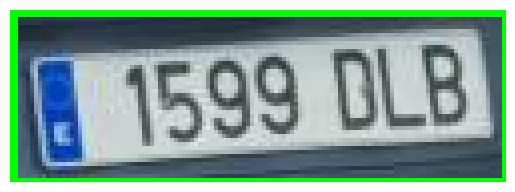

Texto detectado en la imagen:
1599 DLB


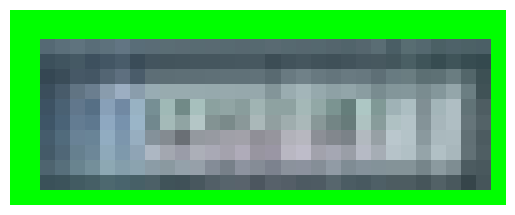

Texto detectado en la imagen:


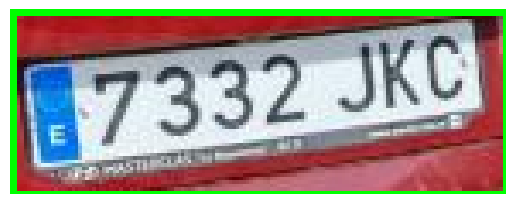

Texto detectado en la imagen:
7332 JKO


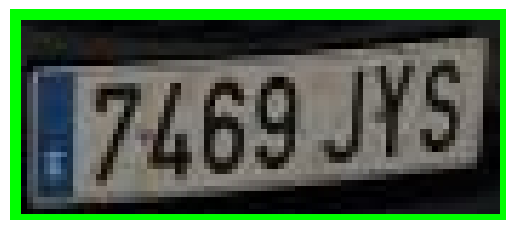

Texto detectado en la imagen:
7469 JYs]


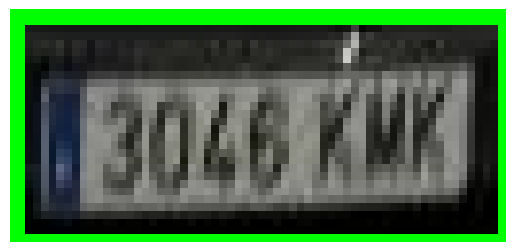

Texto detectado en la imagen:
Euliiy


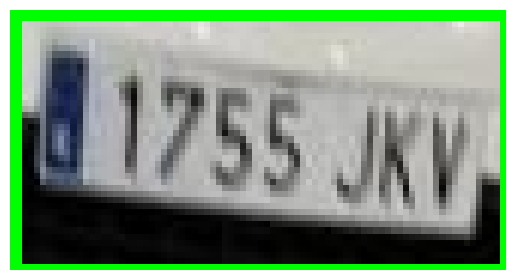

Texto detectado en la imagen:
1255 JKV


In [20]:
import easyocr
import matplotlib.pyplot as plt
import cv2

reader = easyocr.Reader(['es'])
result_direct = []

for img in cropped_words:

    result = reader.readtext(img, detail = 0 )  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_direct.append(result)
    # Mostrar la imagen con el texto detectado
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Mostrar el resultado de texto detectado
    print("Texto detectado en la imagen:")
    for res in result:
        print(res)


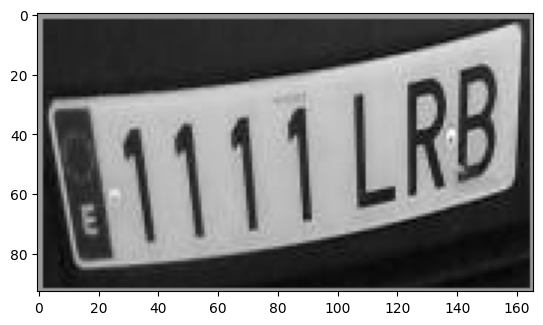

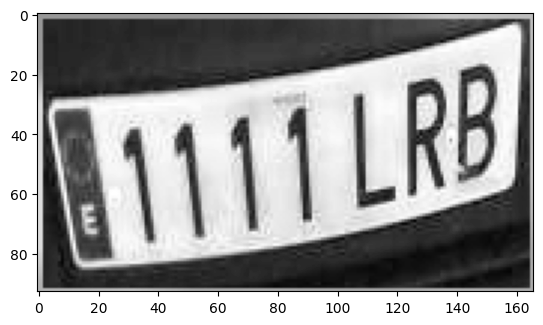

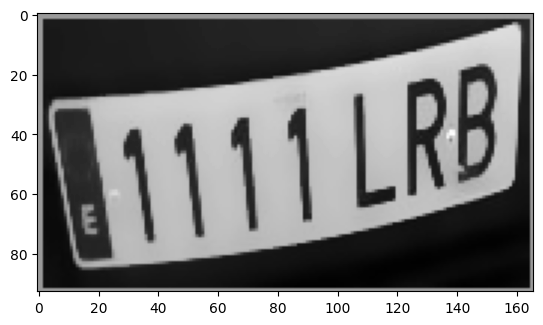

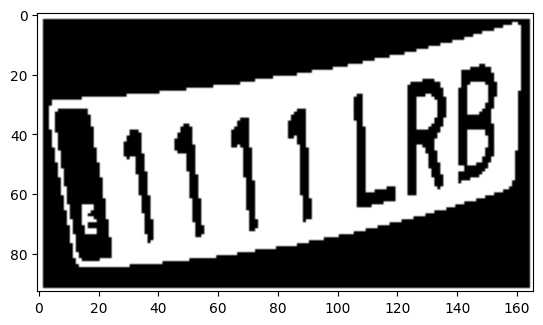

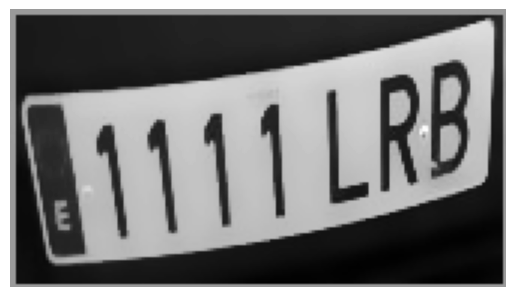

Texto detectado en la imagen:
1111LRB]


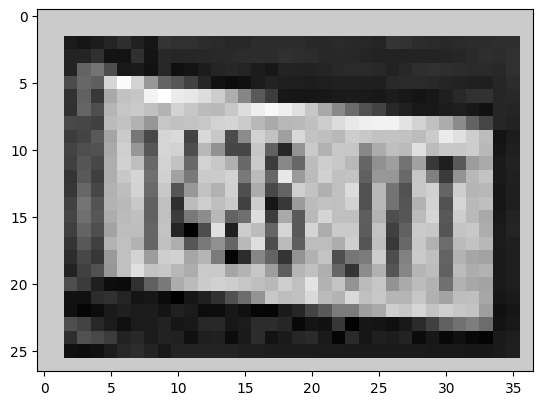

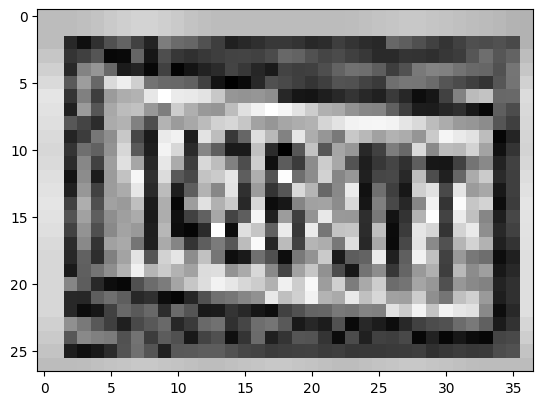

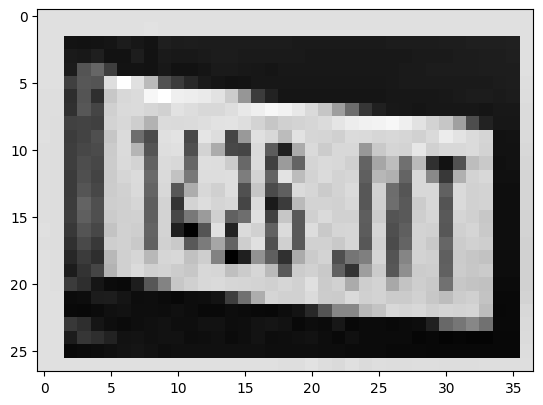

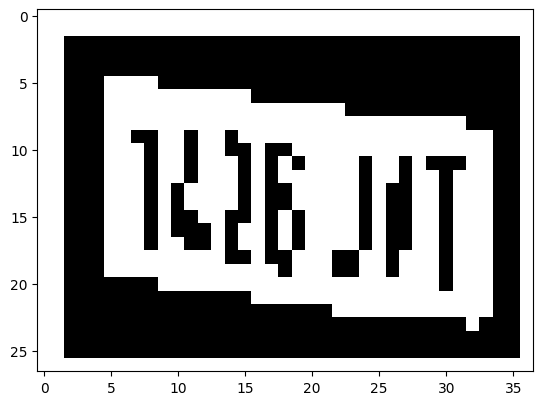

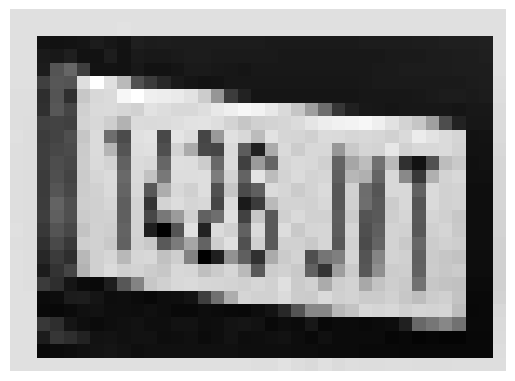

Texto detectado en la imagen:


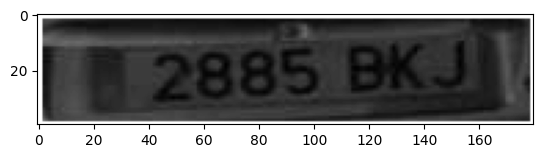

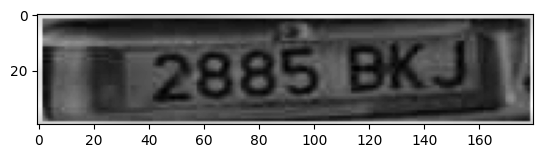

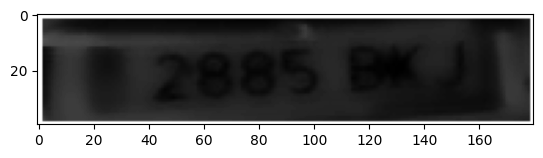

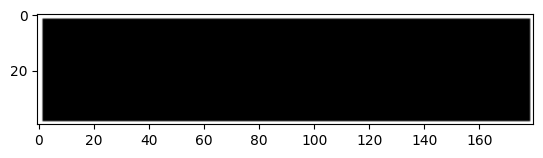

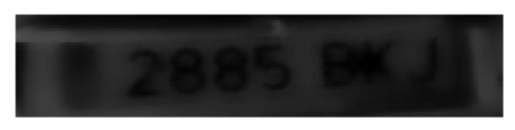

Texto detectado en la imagen:
1


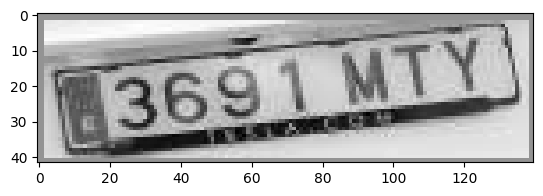

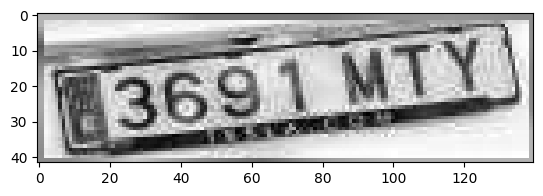

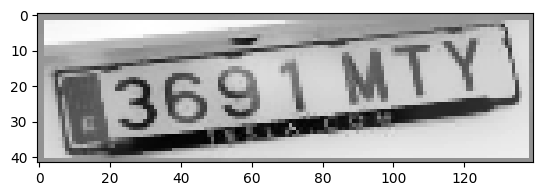

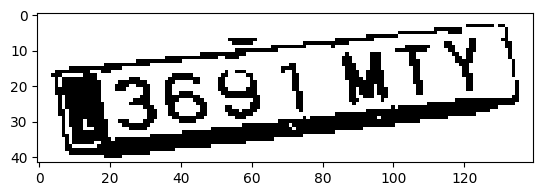

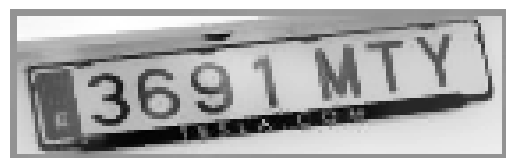

Texto detectado en la imagen:
369
IMY


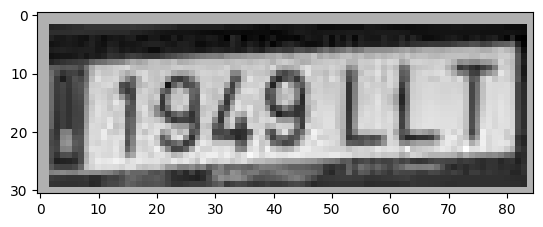

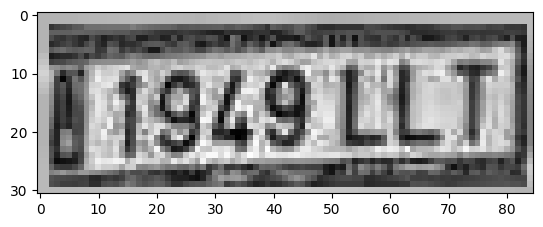

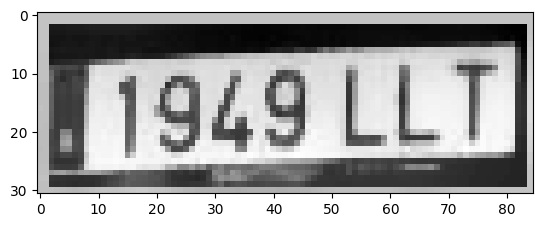

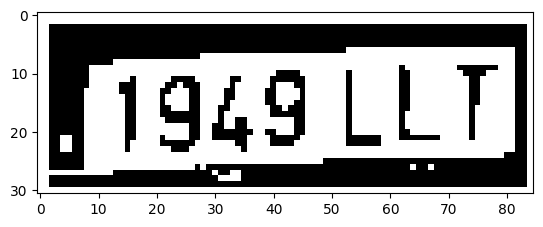

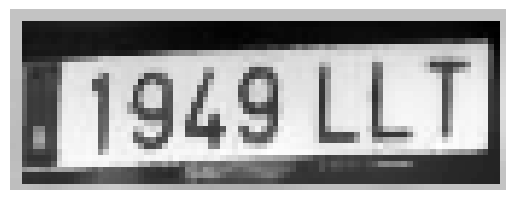

Texto detectado en la imagen:
1949 LLT


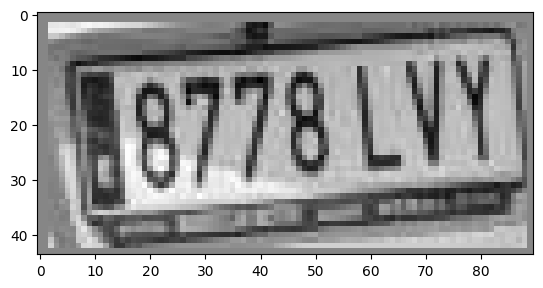

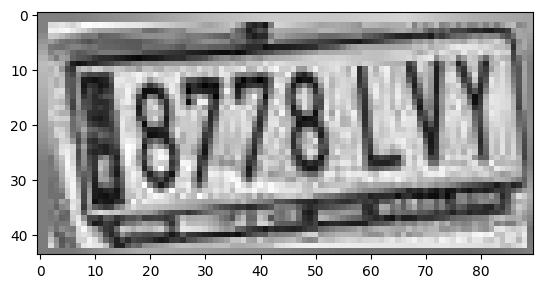

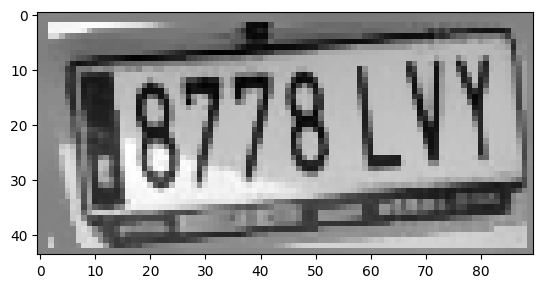

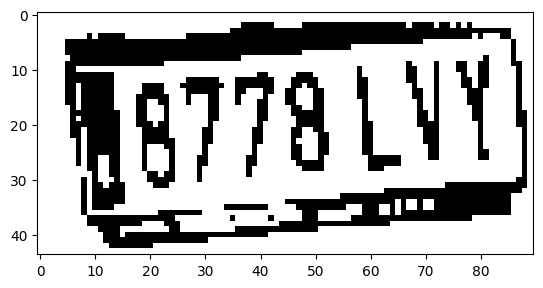

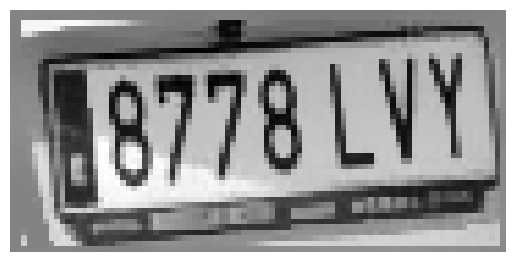

Texto detectado en la imagen:
[8778 LVY


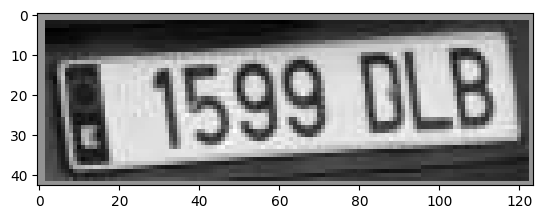

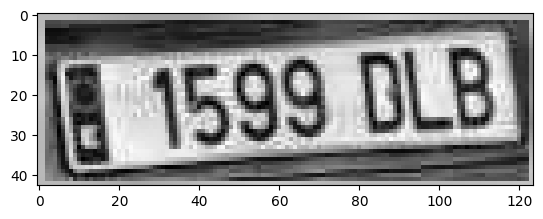

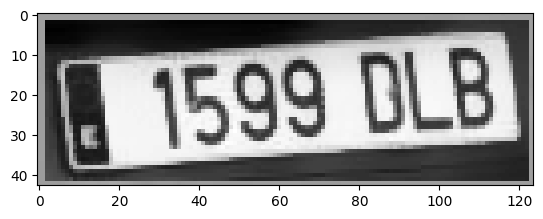

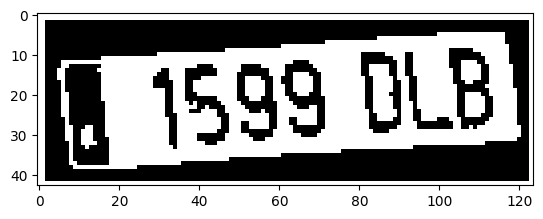

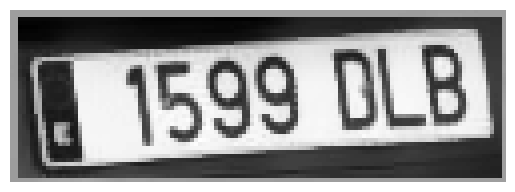

Texto detectado en la imagen:
1599 DLB


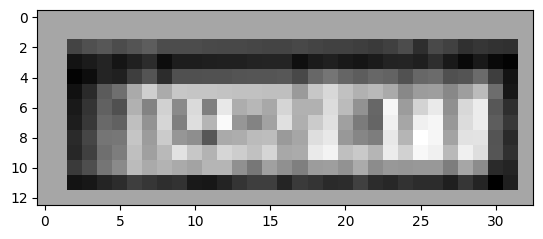

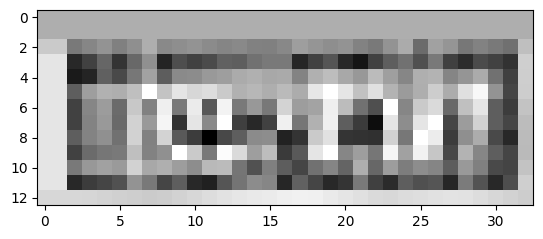

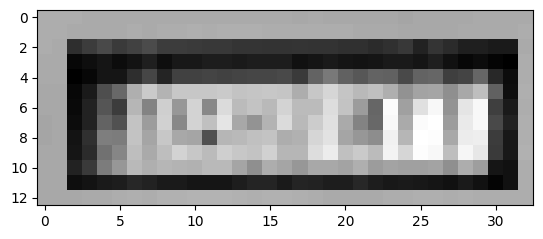

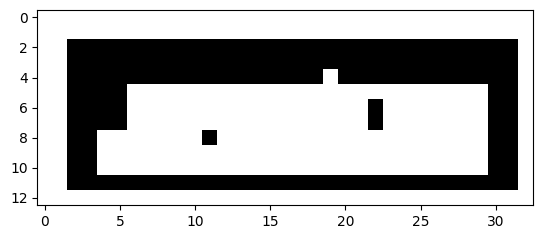

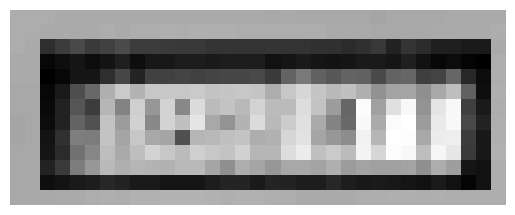

Texto detectado en la imagen:


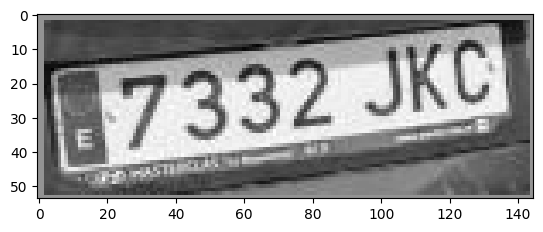

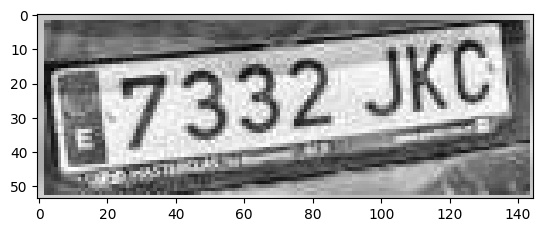

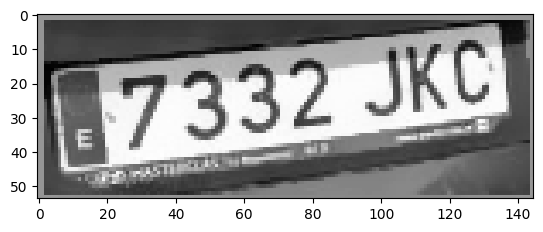

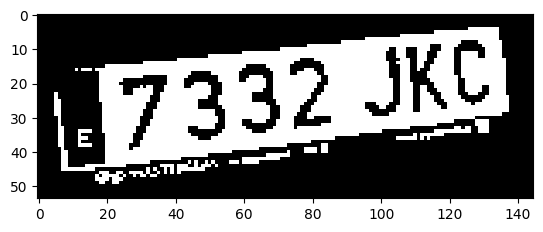

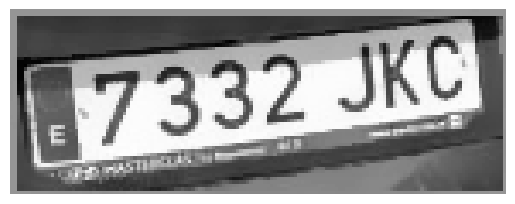

Texto detectado en la imagen:
7332 JKC


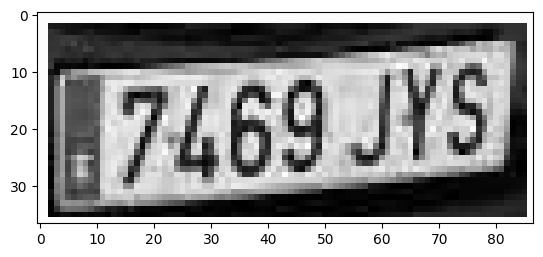

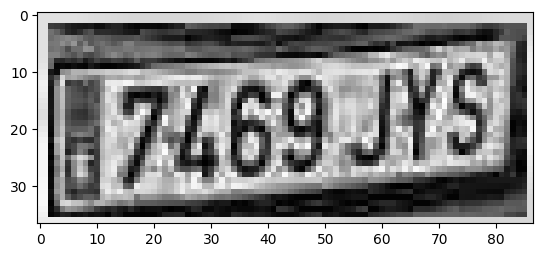

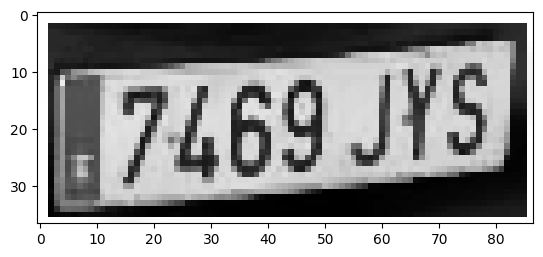

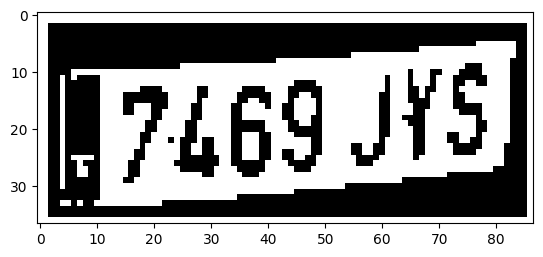

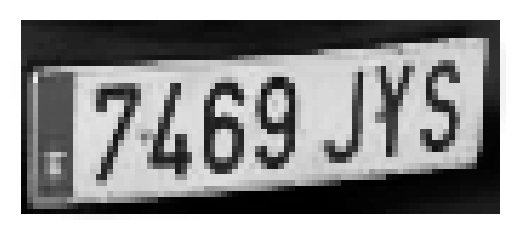

Texto detectado en la imagen:
7469 JYs]


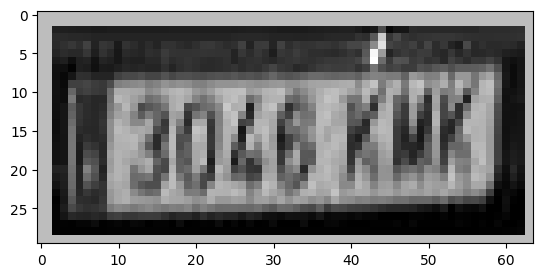

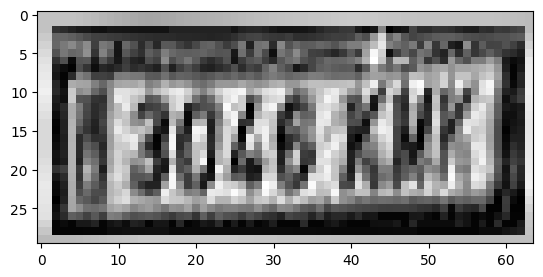

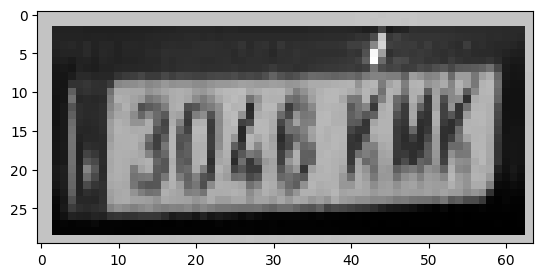

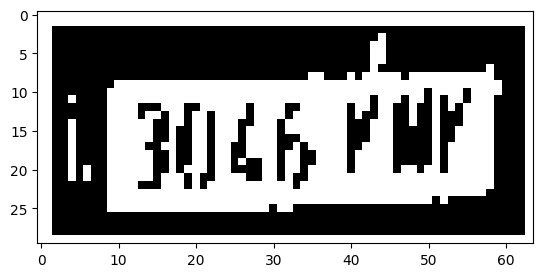

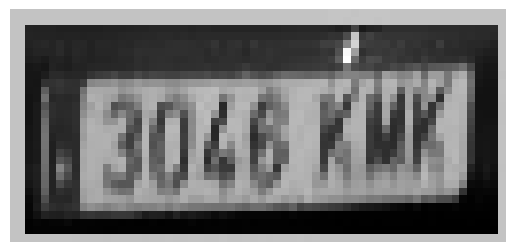

Texto detectado en la imagen:
E06


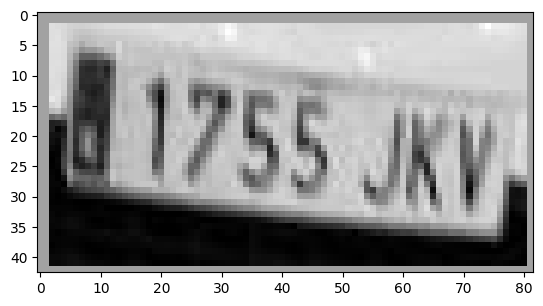

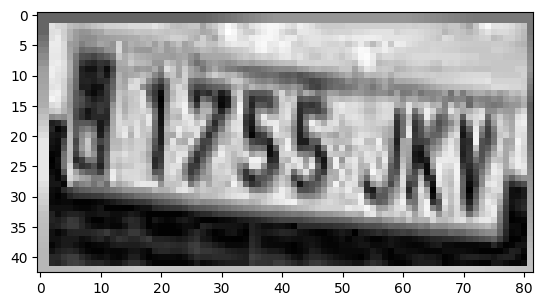

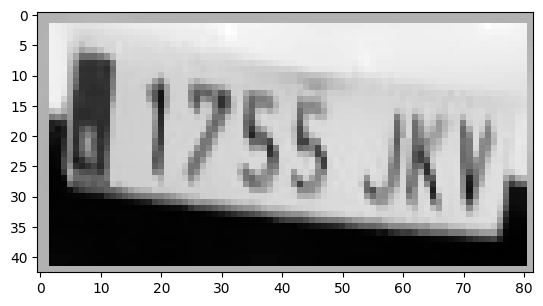

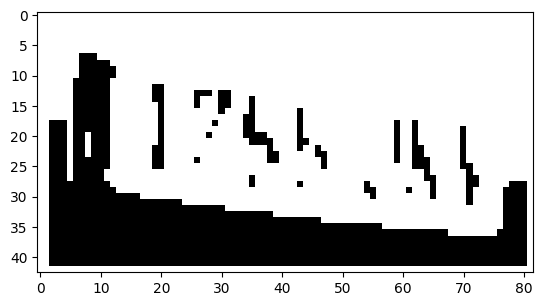

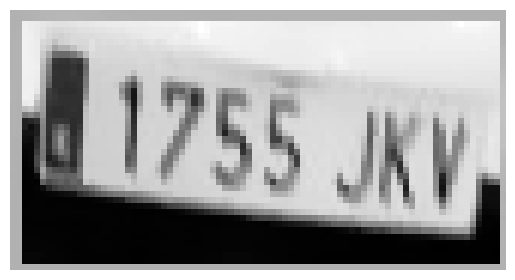

Texto detectado en la imagen:
1755 JKV


In [21]:
result_prepro = []
for img in cropped_words:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(img,'gray')
    plt.show()

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast = clahe.apply(img)
    plt.imshow(contrast,'gray')
    plt.show()

    # Aplicar desenfoque (filtro bilateral o GaussianBlur)
    img = cv2.bilateralFilter(img, 11, 17, 17)
    plt.imshow(img,'gray')
    plt.show()



    # Aplicar umbralización (adaptativa o de Otsu)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(binary,'gray')
    plt.show()

    result = reader.readtext(img, detail = 0)  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_prepro.append(result)

    # Mostrar la imagen con el texto detectado
    plt.imshow(img,'gray')
    plt.axis('off')
    plt.show()

    print("Texto detectado en la imagen:")
    for res in result:
        print(res)

In [22]:
list(zip(groundtruth,result_direct,result_prepro))

[('1111LRB', ['LRb', '1111'], ['1111LRB]']),
 ('1426JVT', ['126 Ji'], []),
 ('2885BKJ', ['2883@'], ['1']),
 ('3691MTY', ['MIY', '3691'], ['369', 'IMY']),
 ('1949LLT', ['[9LILLI'], ['1949 LLT']),
 ('8778LVY', ['8778 LVY'], ['[8778 LVY']),
 ('1599DLB', ['1599 DLB'], ['1599 DLB']),
 ('3497BYY', [], []),
 ('7332JKC', ['7332 JKO'], ['7332 JKC']),
 ('7469JYS', ['7469 JYs]'], ['7469 JYs]']),
 ('3046KMK', ['Euliiy'], ['E06']),
 ('1755JKV', ['1255 JKV'], ['1755 JKV'])]

In [23]:
pip install python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.1 MB/s eta 0:00:00


In [24]:
import Levenshtein

def compute_levenshtein_similarity(groundtruth, result_direct, result_prepro):
    total_direct_similarity = 0
    total_prepro_similarity = 0
    num_samples = len(groundtruth)

    comparison = []

    for gt, direct, prepro in zip(groundtruth, result_direct, result_prepro):
        # Unir los resultados (por si hay listas) y convertir en string vacíos si no hay resultado
        direct_str = ''.join(direct) if direct else ''
        prepro_str = ''.join(prepro) if prepro else ''

        # Calcular distancia de Levenshtein para ambas aproximaciones
        direct_levenshtein = Levenshtein.distance(gt, direct_str)
        prepro_levenshtein = Levenshtein.distance(gt, prepro_str)

        # Normalizar la distancia (1 - (distance / max_length)) para obtener la proporción de acierto
        max_len = max(len(gt), len(direct_str), len(prepro_str))
        direct_similarity = 1 - (direct_levenshtein / max_len) if max_len > 0 else 0
        prepro_similarity = 1 - (prepro_levenshtein / max_len) if max_len > 0 else 0

        # Acumular para el promedio
        total_direct_similarity += direct_similarity
        total_prepro_similarity += prepro_similarity

        # Guardar resultados en la lista de comparación
        comparison.append({
            'Ground Truth': gt,
            'Direct Result': direct_str,
            'Direct Similarity': direct_similarity,
            'Preprocessed Result': prepro_str,
            'Preprocessed Similarity': prepro_similarity
        })

    # Calcular el promedio de aciertos para ambos métodos
    avg_direct_similarity = total_direct_similarity / num_samples
    avg_prepro_similarity = total_prepro_similarity / num_samples

    return comparison, avg_direct_similarity, avg_prepro_similarity

# Uso del código con tus datos:
comparison_results, avg_direct_similarity, avg_prepro_similarity = compute_levenshtein_similarity(groundtruth, result_direct, result_prepro)


# Imprimir las similitudes promedio de cada método
print("Result Reader Configuration 'ES': \n")
print(f"Average Direct Similarity: {avg_direct_similarity:.2f}")
print(f"Average Preprocessed Similarity: {avg_prepro_similarity:.2f}\n")


for result in comparison_results:
    print(f"Ground Truth: {result['Ground Truth']}")
    print(f"Direct Result: {result['Direct Result']} (Similarity: {result['Direct Similarity']:.2f})")
    print(f"Preprocessed Result: {result['Preprocessed Result']} (Similarity: {result['Preprocessed Similarity']:.2f})")
    print("-" * 50)



Result Reader Configuration 'ES': 

Average Direct Similarity: 0.47
Average Preprocessed Similarity: 0.57

Ground Truth: 1111LRB
Direct Result: LRb1111 (Similarity: 0.25)
Preprocessed Result: 1111LRB] (Similarity: 0.88)
--------------------------------------------------
Ground Truth: 1426JVT
Direct Result: 126 Ji (Similarity: 0.43)
Preprocessed Result:  (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 2885BKJ
Direct Result: 2883@ (Similarity: 0.43)
Preprocessed Result: 1 (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 3691MTY
Direct Result: MIY3691 (Similarity: 0.14)
Preprocessed Result: 369IMY (Similarity: 0.71)
--------------------------------------------------
Ground Truth: 1949LLT
Direct Result: [9LILLI (Similarity: 0.50)
Preprocessed Result: 1949 LLT (Similarity: 0.88)
--------------------------------------------------
Ground Truth: 8778LVY
Direct Result: 8778 LVY (Similarity: 0.89)
Preprocessed Result: [8778 L

In [25]:
reader = easyocr.Reader(['en'])
result_direct = []

for img in cropped_words:
    result = reader.readtext(img, detail = 0 )  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_direct.append(result)

result_prepro = []
for img in cropped_words:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast = clahe.apply(img)
    img = cv2.bilateralFilter(img, 11, 17, 17)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    result = reader.readtext(img, detail = 0)  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_prepro.append(result)

comparison_results, avg_direct_similarity, avg_prepro_similarity = compute_levenshtein_similarity(groundtruth, result_direct, result_prepro)


# Imprimir las similitudes promedio de cada método
print("Result Reader Configuration 'EN': \n")
print(f"Average Direct Similarity: {avg_direct_similarity:.2f}")
print(f"Average Preprocessed Similarity: {avg_prepro_similarity:.2f}\n")


for result in comparison_results:
    print(f"Ground Truth: {result['Ground Truth']}")
    print(f"Direct Result: {result['Direct Result']} (Similarity: {result['Direct Similarity']:.2f})")
    print(f"Preprocessed Result: {result['Preprocessed Result']} (Similarity: {result['Preprocessed Similarity']:.2f})")
    print("-" * 50)



Progress: |██████████████████████████████████████████████████| 100.0% CompleteResult Reader Configuration 'EN': 

Average Direct Similarity: 0.46
Average Preprocessed Similarity: 0.48

Ground Truth: 1111LRB
Direct Result: LRB1111 (Similarity: 0.25)
Preprocessed Result: MOOOLRBL (Similarity: 0.38)
--------------------------------------------------
Ground Truth: 1426JVT
Direct Result: 1l26J (Similarity: 0.57)
Preprocessed Result:  (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 2885BKJ
Direct Result: 3885 Bi (Similarity: 0.43)
Preprocessed Result: 1 (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 3691MTY
Direct Result: MIY3691 (Similarity: 0.14)
Preprocessed Result: 369TMIY (Similarity: 0.71)
--------------------------------------------------
Ground Truth: 1949LLT
Direct Result: [9L9 LLT (Similarity: 0.62)
Preprocessed Result: 1949 LLT (Similarity: 0.88)
--------------------------------------------------
Ground Truth

#Conclusion from EASYOCR and Text Similarity Report:
This comparison evaluates the performance of two OCR configurations (es for Spanish and en for English) in extracting text from images of vehicle license plates. The results are compared using direct extraction and a preprocessed extraction that applies contrast enhancement, noise reduction. The similarity between extracted text and ground truth is calculated using **Levenshtein similarity**.

##Spanish (es) Configuration:
Average Direct Similarity: 0.47
Average Preprocessed Similarity: 0.57
The preprocessing step improves the similarity score by 10%, indicating that it helps in extracting more accurate text. For some ground truth values (e.g., 1111LRB, 3691MTY, and 1949LLT).

However, there are instances where both direct and preprocessed results fail to match the ground truth accurately, such as 3497BYY and 3046KMK, where no meaningful text is extracted.

##English (en) Configuration:
Average Direct Similarity: 0.46
Average Preprocessed Similarity: 0.48
In the English configuration, preprocessing provides a smaller improvement, increasing the similarity by only 2%. It shows mixed results: for some cases (e.g., 1949LLT, 3691MTY), preprocessing improves the accuracy significantly. However, in some cases (e.g., 3046KMK, 1426JVT), the preprocessed result does not offer any advantage or yields incorrect text.

###Key Observations:
**The preprocessing method (contrast enhancement, noise reduction, and thresholding) is more beneficial in the Spanish (es) configuration than in the English (en) configuration.**
In both cases, preprocessing shows the most significant impact on improving the similarity for license plates with medium complexity (e.g., 3691MTY, 1111LRB).

Final Conclusion:
The es configuration with preprocessing offers the best performance for this dataset, achieving an average similarity score of 0.57. The preprocessing step helps with noisy or complex images but may not work well for all cases.